<a href="https://colab.research.google.com/github/marcin-tarka/notebooks/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple notebook to play with mnist dataset and Keras.

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Printing random train example of index 49888


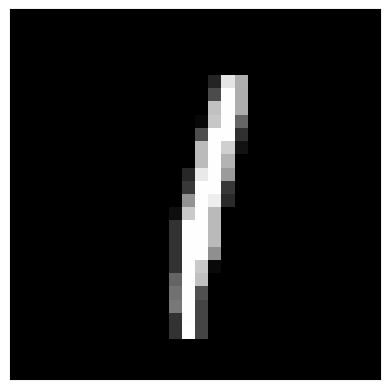

In [6]:
import matplotlib.pyplot as plt
import random

def print_img(img_array):
  plt.imshow(img_array, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

rand = random.randint(0, x_train.shape[0]-1)
print("Printing random train example of index", rand)
print_img(x_train[rand])

In [7]:
# Preprocess the data
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

In [8]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 1.0350 - accuracy: 0.6704 - val_loss: 0.5921 - val_accuracy: 0.8298
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5571 - accuracy: 0.8342 - val_loss: 0.3859 - val_accuracy: 0.8892
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8840 - val_loss: 0.2889 - val_accuracy: 0.9200
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.9007 - val_loss: 0.2532 - val_accuracy: 0.9255
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9124 - val_loss: 0.2192 - val_accuracy: 0.9350
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2618 - accuracy: 0.9231 - val_loss: 0.2072 - val_accuracy: 0.9388
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2366 - accuracy: 0.9301 - val_loss: 0.1829 - val_accuracy:

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Test loss: 0.17066948115825653
Test accuracy: 0.9478999972343445


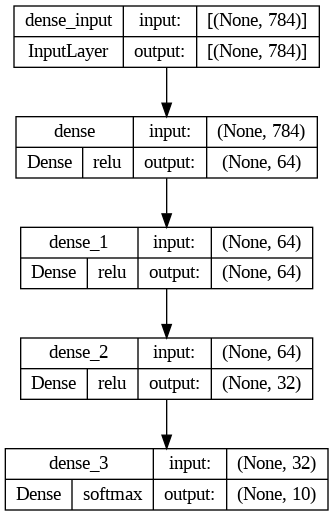

In [12]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)
Image('model_plot.png')

In [15]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


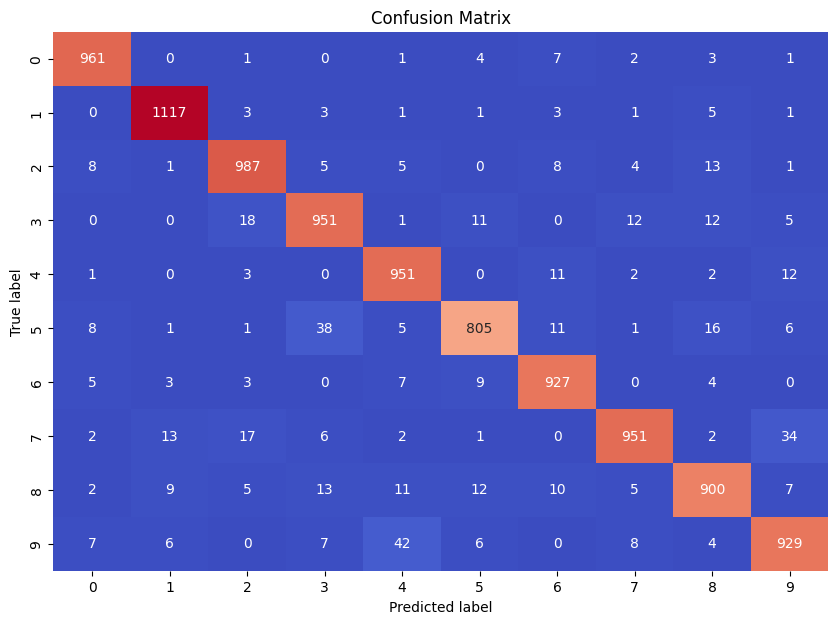

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()